# Fraud Detection Case Study

In [2]:
import numpy as np
import pandas as pd
from itertools import *
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.ensemble import RandomForestClassifier as RFC

from numpy.linalg import svd

import matplotlib.pyplot as plt
%matplotlib inline

import random
import cPickle as pickle


# Part 1: EDA

In [3]:
df = pd.read_json('../data/data.json')

Singular Value Decomposition (To reduce the number of features) -

https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html



In [3]:
data.head(3)

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,...,"[{u'event_id': 527017, u'cost': 25.0, u'availa...",36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,...,"[{u'event_id': 786878, u'cost': 35.0, u'availa...",149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,...,"[{u'event_id': 787337, u'cost': 93.51, u'avail...",214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA


In [4]:
data['description'][0]

import re

def cleanhtml(raw_html):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', raw_html)
    return cleantext



u'<p><a href="http://s432.photobucket.com/albums/qq49/digusonline/?action=view&amp;current=supersunday.jpg" target="_blank"><img src="http://i432.photobucket.com/albums/qq49/digusonline/supersunday.jpg" border="0" alt="Photobucket" /></a></p>\r\n<p>\xa0</p>\r\n<p style="text-align: center;"><font size="3"><strong>Party Starz Entertaintment &amp; Diverse International Group Presents...<br /></strong></font><br /><font face="tahoma,arial,helvetica,sans-serif" size="4"><strong>The Official\xa0"99 Hour No Sleep" Super Bowl </strong></font></p>\r\n<p style="text-align: center;"><font face="tahoma,arial,helvetica,sans-serif" size="4"><strong>Weekend </strong></font><font face="tahoma,arial,helvetica,sans-serif" size="4"><strong>Grand Finale</strong></font></p>\r\n<p><br /><span style="font-family: Times New Roman,serif;"><font size="3"><font face="tahoma,arial,helvetica,sans-serif">No matter who wins or loses, this post-game party cannot be missed! Enjoy the drink specials and all night musi

In [ ]:
data['']

In [4]:
data['acct_type'].unique()

array([u'fraudster_event', u'premium', u'spammer_warn', u'fraudster',
       u'spammer_limited', u'spammer_noinvite', u'locked', u'tos_lock',
       u'tos_warn', u'fraudster_att', u'spammer_web', u'spammer'], dtype=object)

In [5]:
Counter(data['acct_type'])

Counter({u'fraudster': 437,
         u'fraudster_att': 5,
         u'fraudster_event': 851,
         u'locked': 54,
         u'premium': 12373,
         u'spammer': 1,
         u'spammer_limited': 218,
         u'spammer_noinvite': 84,
         u'spammer_warn': 144,
         u'spammer_web': 2,
         u'tos_lock': 77,
         u'tos_warn': 91})

In [6]:
# data[data['acct_type']=='locked']

In [7]:
a_loon = {'fraudster': 1, 'fraudster_att': 1, 'fraudster_event': 1, 'locked': 1, 'premium': 0}


In [8]:
df_first = data[(data['acct_type']=='fraudster') | (data['acct_type']=='fraudster_att') | (data['acct_type']=='fraudster_event')
    | (data['acct_type']=='premium')]

In [9]:
y = df_first['acct_type'].map(a_loon)

In [10]:
df_first.columns

Index([u'acct_type', u'approx_payout_date', u'body_length', u'channels',
       u'country', u'currency', u'delivery_method', u'description',
       u'email_domain', u'event_created', u'event_end', u'event_published',
       u'event_start', u'fb_published', u'gts', u'has_analytics',
       u'has_header', u'has_logo', u'listed', u'name', u'name_length',
       u'num_order', u'num_payouts', u'object_id', u'org_desc',
       u'org_facebook', u'org_name', u'org_twitter', u'payee_name',
       u'payout_type', u'previous_payouts', u'sale_duration',
       u'sale_duration2', u'show_map', u'ticket_types', u'user_age',
       u'user_created', u'user_type', u'venue_address', u'venue_country',
       u'venue_latitude', u'venue_longitude', u'venue_name', u'venue_state'],
      dtype='object')

In [11]:
# df_first[(df_first['fb_published'] == 1) & (df_first['acct_type'] == 'premium') ]

In [12]:
df_first['regi_use_time_delta'] = df_first['event_created'] - df_first['user_created']

/home/sanhita/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [13]:
# df_first[['regi_use_time_delta', 'acct_type']]

In [14]:
df_first[df_first['acct_type'].str.contains('fraud')]['regi_use_time_delta'].mean()

7528982.6055684453

In [15]:
df_first[df_first['acct_type'].str.contains('premium')]['regi_use_time_delta'].mean()

34292148.041461244

In [16]:
col = 'show_map'
print df_first[df_first['acct_type'].str.contains('fraud')][col].mean(), 
df_first[df_first['acct_type'].str.contains('premium')][col].mean()

0.756380510441

0.850804170370969

In [17]:
col = 'fb_published'
print df_first[df_first['acct_type'].str.contains('fraud')][col].mean(), 
df_first[df_first['acct_type'].str.contains('premium')][col].mean()

0.0224284609435

0.13569869877960075

In [18]:
col = 'has_logo'
print df_first[df_first['acct_type'].str.contains('fraud')][col].mean(), 
df_first[df_first['acct_type'].str.contains('premium')][col].mean()

0.645784996133

0.86106845550796085

In [19]:
col = 'has_header'
print df_first[df_first['acct_type'].str.contains('fraud')][col].mean(), 
df_first[df_first['acct_type'].str.contains('premium')][col].mean()

0.0693641618497

0.21320754716981133

In [84]:
col = 'has_header'
df_first[col].unique()

array([  1.,   0.,  nan])

In [20]:
col = 'org_facebook'
print df_first[df_first['acct_type'].str.contains('fraud')][col].mean(), 
df_first[df_first['acct_type'].str.contains('premium')][col].mean()

1.03554119548

8.60037189748565

array([  0.,  18.,   8.,  17.,  13.,  16.,  29.,  19.,  10.,  15.,   9.,
        26.,   6.,  11.,  35.,  20.,  40.,  48.,  12.,   5.,  22.,  34.,
        14.,  24.,   7.,  43.,  25.,  23.,  36.,  21.,  32.,  45.,  91.,
        39.,  52.,  51.,  33.,  27.,  37.,  66.,  78.,  62.,  46.,  nan,
        28.,  30.,  61.,  83.,  56.,  44.,  47.,  42.,  63.,  53.,  76.,
        41.,  38.,  31.,  69.,  71.,  50.,  55.,  49.,  81.,  88.,  64.,
        70.,   4.,  57.,  58.,  59.,   3.,  54.,  73.,  65.,  72.,  67.,
        60.,  80.,  85.,  75.,  79.])

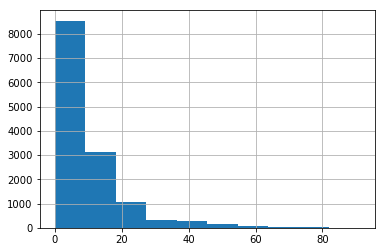

In [87]:
df_first['org_facebook'].hist()
df_first['org_facebook'].unique()

In [22]:
col = 'listed'
yn_map = {'y': 1, 'n' : 0}
df_first['listed'] = df_first['listed'].map(yn_map)
print df_first[df_first['acct_type'].str.contains('fraud')][col].mean(), 
df_first[df_first['acct_type'].str.contains('premium')][col].mean()

0.832173240526

/home/sanhita/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


0.85702739836741293

In [23]:
col = 'org_twitter'
print df_first[df_first['acct_type'].str.contains('fraud')][col].mean(), 
df_first[df_first['acct_type'].str.contains('premium')][col].mean()

0.294022617124

4.652680087315062

array([  0.,  12.,   8.,  15.,  14.,  11.,  16.,   5.,   6.,  10.,   9.,
        13.,   7.,   2.,  17.,  18.,  nan,  20.,  21.,   4.,  23.,  34.,
         3.,  19.])

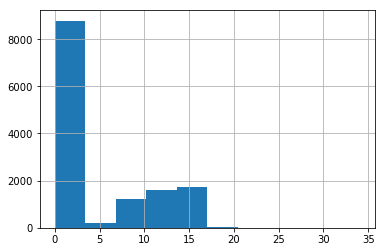

In [86]:
col = 'org_twitter'
df_first[col].hist()
df_first[col].unique()

In [89]:
col = 'sale_duration'
print df_first[df_first['acct_type'].str.contains('fraud')][col].mean(), 
df_first[df_first['acct_type'].str.contains('premium')][col].mean()


14.1259574468

50.395477020345304

In [25]:
col = 'gts'
print df_first[df_first['acct_type'].str.contains('fraud')][col].mean(), 
df_first[df_first['acct_type'].str.contains('premium')][col].mean()

1911.21436195

2531.424853309616

In [26]:
col = 'has_analytics'
print df_first[df_first['acct_type'].str.contains('fraud')][col].mean(), 
df_first[df_first['acct_type'].str.contains('premium')][col].mean()
df_first[col].

0.0030935808198

0.082033459953123736

In [27]:
df_first.columns

Index([          u'acct_type',  u'approx_payout_date',         u'body_length',
                  u'channels',             u'country',            u'currency',
           u'delivery_method',         u'description',        u'email_domain',
             u'event_created',           u'event_end',     u'event_published',
               u'event_start',        u'fb_published',                 u'gts',
             u'has_analytics',          u'has_header',            u'has_logo',
                    u'listed',                u'name',         u'name_length',
                 u'num_order',         u'num_payouts',           u'object_id',
                  u'org_desc',        u'org_facebook',            u'org_name',
               u'org_twitter',          u'payee_name',         u'payout_type',
          u'previous_payouts',       u'sale_duration',      u'sale_duration2',
                  u'show_map',        u'ticket_types',            u'user_age',
              u'user_created',           u'user_type

In [28]:
col = 'name_length'
print df_first[df_first['acct_type'].str.contains('fraud')][col].mean(), 
df_first[df_first['acct_type'].str.contains('premium')][col].mean()

29.9752513534

42.479915946011474

In [29]:
col = 'payee_name'
df_first[df_first[col]==u''][['acct_type', col]]
f_name = df_first[(df_first['acct_type'].str.contains('fraud')) & (df_first[col]==u'')]['acct_type'].count()
p_name = df_first[(df_first['acct_type'].str.contains('premium')) & (df_first[col]==u'')]['acct_type'].count()

print f_name*1.0 / len(df_first[df_first['acct_type'].str.contains('fraud')]), 
p_name*1.0 / len(df_first[df_first['acct_type'].str.contains('premium')])

0.976798143852

0.75850642528085344

In [30]:
col = 'payout_type'
df_first[col].unique()
# df_first[(df_first['acct_type'].str.contains('premium')) & (df_first[col] != 'CHECK') & (df_first[col] != 'ACH')][['acct_type', col]]

array([u'', u'CHECK', u'ACH'], dtype=object)

In [31]:
df_first[(df_first['acct_type'].str.contains('fraud')) & (df_first[col] != 'CHECK') & (df_first[col] != 'ACH')][['acct_type', col]]

,acct_type,payout_type
0,fraudster_event,
183,fraudster,
187,fraudster_event,
212,fraudster_event,
219,fraudster_event,
289,fraudster_event,
296,fraudster_event,
307,fraudster_event,
330,fraudster_event,
440,fraudster_event,


In [32]:
col = 'num_payouts'
# df_first[col]
print df_first[df_first['acct_type'].str.contains('fraud')][col].mean(), 
df_first[df_first['acct_type'].str.contains('premium')][col].mean()

0.582366589327

37.432635577467067

In [33]:
col = 'name_length'
print df_first[df_first['acct_type'].str.contains('fraud')][col].mean(), 
df_first[df_first['acct_type'].str.contains('premium')][col].mean()

29.9752513534

42.479915946011474

In [34]:
col = 'previous_payouts'

df_first[df_first['acct_type'].str.contains('premium')][col]


for i in xrange(len(df_first)):
    
    len(df_first[col][0])

In [35]:
col = 'previous_payouts'
length_list = []

for i in xrange(len(df_first)):
#     length_list.append(len(df_first[col][i]))
    length_list.append(((len(df_first.iloc[i][col]), i)))
    
max(length_list)

(2048, 12138)

In [36]:
for i in xrange(10):
    if 'premium' in str(df_first['acct_type'][i]):
        print True
    elif 'fraud' in str(df_first['acct_type'][i]):
        print False
    else:
        print 'Bummer'

False
True
True
True
True
True
True
True
True
True


In [37]:
col = 'previous_payouts'
length_list_fraud = []
length_list_gen = []

for i in xrange(len(df_first)):
    if 'premium' in str(df_first['acct_type'][i]):
        length_list_gen.append(((len(df_first.iloc[i][col]), i)))
    elif 'fraud' in str(df_first['acct_type'][i]):
        length_list_fraud.append(((len(df_first.iloc[i][col]), i)))
    else : 
        continue

print max(length_list_gen), min(length_list_gen), np.mean(length_list_gen)

KeyError: 13

In [189]:
df_first.iloc[12138][['acct_type', col]]

acct_type                                                     premium
previous_payouts    [{u'name': u'Seneca Lake Winery Association', ...
Name: 12732, dtype: object

In [91]:
col = 'ticket_types'
type(df_first[col][0][0])

dict

In [184]:
col = 'ticket_types'
length_list = []

for i in xrange(len(df_first)):
#     length_list.append(len(df_first[col][i]))
    length_list.append(((len(df_first.iloc[i][col]), i)))
    
max(length_list)

(116, 9258)

In [186]:
df_first.iloc[9258][col]

[{u'availability': 1,
  u'cost': 100.0,
  u'event_id': 3814948,
  u'quantity_sold': 8,
  u'quantity_total': 1},
 {u'availability': 1,
  u'cost': 75.0,
  u'event_id': 3814948,
  u'quantity_sold': 4,
  u'quantity_total': 1},
 {u'availability': 1,
  u'cost': 75.0,
  u'event_id': 3814948,
  u'quantity_sold': 4,
  u'quantity_total': 1},
 {u'availability': 1,
  u'cost': 50.0,
  u'event_id': 3814948,
  u'quantity_sold': 2,
  u'quantity_total': 1},
 {u'availability': 1,
  u'cost': 50.0,
  u'event_id': 3814948,
  u'quantity_sold': 6,
  u'quantity_total': 1},
 {u'availability': 1,
  u'cost': 50.0,
  u'event_id': 3814948,
  u'quantity_sold': 8,
  u'quantity_total': 1},
 {u'availability': 1,
  u'cost': 50.0,
  u'event_id': 3814948,
  u'quantity_sold': 4,
  u'quantity_total': 1},
 {u'availability': 1,
  u'cost': 50.0,
  u'event_id': 3814948,
  u'quantity_sold': 3,
  u'quantity_total': 1},
 {u'availability': 1,
  u'cost': 50.0,
  u'event_id': 3814948,
  u'quantity_sold': 2,
  u'quantity_total': 1},


In [107]:
lst = df_first[col]

In [134]:
len(df_first)
for i in xrange(50):
    t = pd.DataFrame(lst[i])
    print i, t.iloc[:, 3].sum(), df_first['acct_type'][i]

0 0 fraudster_event
1 25 premium
2 48 premium
3 58 premium
4 39 premium
5 37 premium
6 36 premium
7 57 premium
8 14 premium
9 64 premium
10 33 premium
11 21 premium
12 7 premium


KeyError: 13

In [109]:
df_tt

,ticket_types
0,"[{u'event_id': 527017, u'cost': 25.0, u'availa..."
1,"[{u'event_id': 786878, u'cost': 35.0, u'availa..."
2,"[{u'event_id': 787337, u'cost': 93.51, u'avail..."
3,"[{u'event_id': 885645, u'cost': 25.0, u'availa..."
4,"[{u'event_id': 1114349, u'cost': 150.0, u'avai..."
5,"[{u'event_id': 1179983, u'cost': 8.0, u'availa..."
6,"[{u'event_id': 1180179, u'cost': 22.63, u'avai..."
7,"[{u'event_id': 1180391, u'cost': 14.0, u'avail..."
8,"[{u'event_id': 1180423, u'cost': 250.0, u'avai..."
9,"[{u'event_id': 1180435, u'cost': 14.0, u'avail..."


In [41]:
df_first[['ticket_types', 'previous_payouts']].from_records

<bound method type.from_records of <class 'pandas.core.frame.DataFrame'>>

In [67]:
col = 'previous_payouts'

lst_prev_pay = []
for i in xrange(len(df_first)):
# for i in xrange(20):
     lst_prev_pay.append((len(df_first.iloc[i][col]), df_first.iloc[i]['acct_type']))
#         print len(df_first.iloc[i][col])

In [74]:
list_prev_pay = [list(elem) for elem in lst_prev_pay]

In [83]:
for i in xrange(len(list_prev_pay)):
# for i in xrange(20):
    total = 0
    count = 0
    if 'fraud' in list_prev_pay[i][1]:
        total += list_prev_pay[i][0]
        count += 1
#         print 'fraud'
        
print total*1.0, count

0.0 1


In [75]:
len(list_prev_pay)

13666

In [112]:
df_first[df_first['acct_type'].str.contains('fraud')]['ticket_types']

0        [{u'event_id': 527017, u'cost': 25.0, u'availa...
26       [{u'event_id': 1386643, u'cost': 300.0, u'avai...
51       [{u'event_id': 1928009, u'cost': 30.0, u'avail...
54       [{u'event_id': 1964043, u'cost': 500.0, u'avai...
70       [{u'event_id': 2228484, u'cost': 30.0, u'avail...
128      [{u'event_id': 3048157, u'cost': 150.0, u'avai...
130      [{u'event_id': 3090085, u'cost': 140.76, u'ava...
131      [{u'event_id': 3104463, u'cost': 200.0, u'avai...
140      [{u'event_id': 3244275, u'cost': 140.76, u'ava...
144      [{u'event_id': 3310151, u'cost': 235.0, u'avai...
149      [{u'event_id': 3423729, u'cost': 35.0, u'avail...
161      [{u'event_id': 3493645, u'cost': 8.46, u'avail...
177      [{u'event_id': 3717486, u'cost': 100.0, u'avai...
181      [{u'event_id': 3798244, u'cost': 22.0, u'avail...
183      [{u'event_id': 3801364, u'cost': 350.0, u'avai...
187      [{u'event_id': 3833884, u'cost': 2.0, u'availa...
202      [{u'event_id': 3998400, u'cost': 100.0, u'avai.

In [114]:
df_first[df_first['acct_type'].str.contains('fraud')]['ticket_types'][14114]

[{u'availability': 1,
  u'cost': 73.0,
  u'event_id': 2940967,
  u'quantity_sold': 0,
  u'quantity_total': 8},
 {u'availability': 1,
  u'cost': 171.0,
  u'event_id': 2940967,
  u'quantity_sold': 1,
  u'quantity_total': 8}]

In [101]:
col = 'previous_payouts'

for i in xrange(len(df_first)):
    total_payout = 0
    count_payouts = len(df_first.iloc[i][col])

    for d in df_first.iloc[i][col]:
        total_payout = d['amount']

    print total_payout, count_payouts

0 0
4715.34 49
2406.83 36
200.06 21
285.0 49
252.0 5
140.0 15
634.0 470
5197.5 2
634.0 470
569.98 96
520.0 262
92.56 50
680.0 8
70.0 1264
70.0 1264
30.0 1
2694.0 11
8645.08 11
1889.0 1
356.42 31
3661.66 13
214.92 207
1190.0 2
135.0 406
0 0
499.7 192
20884.52 216
1615.0 15
5545.0 3
44.0 44
124.62 2
285.0 49
7906.32 6
357.13 2
1118.0 14
936.0 12
3214.74 6
1.0 1
145.38 2
300.0 4
45.0 2
510.0 7
1083.41 2
37.42 77
100.0 3
45.0 14
90.0 1
12.19 10
308.32 2
5897.0 1
234.0 17
0 0
1133.84 72
70.0 1264
976.24 57
80.0 1
280.0 1
976.24 57
7115.0 3
658.17 3
245.0 12
100.0 11
60.0 2
60.0 1
994.62 9
4002.98 10
0 0
905.2 13
67.68 143
71.64 1
20.0 60
20.0 60
6071.0 4
47.0 3
17.5 2
1000.0 1
3699.84 11
7.11 133
4130.34 31
109.02 5
40.0 1
910.0 1
120.95 1666
760.0 5
703.03 394
2589.15 55
275.0 4
150.0 434
1003.26 4
90.0 157
50.0 32
10720.0 4
960.05 12
253.62 3
1640.17 24
613.0 3
831.78 41
196.55 148
15.0 253
4825.75 5
89.04 3
10720.0 4
595.93 31
99.98 121
183.28 4
7.46 45
89.05 9
158.61 1
102.0 1
4775.0 2


In [122]:
col = 'previous_payouts'

lst = []
for i in xrange(len(df_first)):
    total_payout = 0
    count_payouts = len(df_first.iloc[i][col])

    for d in df_first.iloc[i][col]:
        total_payout = d['amount']

    lst.append((total_payout, count_payouts, df_first.iloc[i]['acct_type']))

In [135]:
sum_fraud = 0
sum_prem = 0
for i in xrange(len(lst)):
    if 'fraud' in lst[i][-1]:
        sum_fraud += lst[i][0]
    elif 'premium' in lst[i][-1]:
        sum_prem += lst[i][0]

print sum_fraud/1300, sum_prem/13000

183.883123077 2340.55822


In [136]:
col = 'ticket_types'
df_first[col][0]

[{u'availability': 1,
  u'cost': 25.0,
  u'event_id': 527017,
  u'quantity_sold': 0,
  u'quantity_total': 800},
 {u'availability': 1,
  u'cost': 50.0,
  u'event_id': 527017,
  u'quantity_sold': 0,
  u'quantity_total': 100},
 {u'availability': 1,
  u'cost': 550.0,
  u'event_id': 527017,
  u'quantity_sold': 0,
  u'quantity_total': 20}]

In [176]:
col = 'ticket_types'

lst_tt = []
for i in xrange(len(df_first)):
    quantity_sold = 0
    cost_tickets = 0
    quantity_total = 0
    count_tickets = len(df_first.iloc[i][col])

    for d in df_first.iloc[i][col]:
        quantity_sold += d['quantity_sold']
        cost_tickets += d['cost']*d['quantity_sold']
        quantity_total += d['quantity_total']
        if d['quantity_sold'] > d['quantity_total']:
            print 'Sold tickets are more than total, for row ', i
    lst_tt.append((quantity_sold, cost_tickets, quantity_total, count_tickets, df_first.iloc[i]['acct_type']))

Sold tickets are more than total, for row  58
Sold tickets are more than total, for row  60
Sold tickets are more than total, for row  60
Sold tickets are more than total, for row  60
Sold tickets are more than total, for row  60
Sold tickets are more than total, for row  60
Sold tickets are more than total, for row  89
Sold tickets are more than total, for row  114
Sold tickets are more than total, for row  114
Sold tickets are more than total, for row  120
Sold tickets are more than total, for row  144
Sold tickets are more than total, for row  177
Sold tickets are more than total, for row  207
Sold tickets are more than total, for row  208
Sold tickets are more than total, for row  245
Sold tickets are more than total, for row  248
Sold tickets are more than total, for row  248
Sold tickets are more than total, for row  248
Sold tickets are more than total, for row  248
Sold tickets are more than total, for row  298
Sold tickets are more than total, for row  302
Sold tickets are mor

In [183]:
df_first['ticket_types'][58]

[{u'availability': 1,
  u'cost': 20.0,
  u'event_id': 2031653,
  u'quantity_sold': 6,
  u'quantity_total': 350},
 {u'availability': 1,
  u'cost': 0.0,
  u'event_id': 2031653,
  u'quantity_sold': 0,
  u'quantity_total': 350},
 {u'availability': 1,
  u'cost': 20.0,
  u'event_id': 2031653,
  u'quantity_sold': 2,
  u'quantity_total': 350},
 {u'availability': 1,
  u'cost': 0.0,
  u'event_id': 2031653,
  u'quantity_sold': 0,
  u'quantity_total': 350}]

In [175]:
sum_fraud = 0
sum_prem = 0
sum_total = 0
sum_prem_t = 0
for i in xrange(len(lst)):
    if 'fraud' in lst[i][-1]:
        sum_fraud += lst_tt[i][0]
        sum_total += lst_tt[i][2]
    elif 'premium' in lst[i][-1]:
        sum_prem += lst_tt[i][0]*1.0
        sum_prem_t += lst_tt[i][2]

    else : continue

print sum_fraud/1300, sum_total/ 1300, sum_prem/13000, sum_prem_t /13000

4 55100 69.6019230769 2018


In [149]:
corr = np.stack((np.array(lst), np.array(lst_tt)), axis=1)

In [150]:
corr[:][0]

array([[u'0', u'0', u'fraudster_event'],
       [u'0.0', u'625.0', u'3.0']], 
      dtype='<U32')

In [185]:
df_first.columns

Index([          u'acct_type',  u'approx_payout_date',         u'body_length',
                  u'channels',             u'country',            u'currency',
           u'delivery_method',         u'description',        u'email_domain',
             u'event_created',           u'event_end',     u'event_published',
               u'event_start',        u'fb_published',                 u'gts',
             u'has_analytics',          u'has_header',            u'has_logo',
                    u'listed',                u'name',         u'name_length',
                 u'num_order',         u'num_payouts',           u'object_id',
                  u'org_desc',        u'org_facebook',            u'org_name',
               u'org_twitter',          u'payee_name',         u'payout_type',
          u'previous_payouts',       u'sale_duration',      u'sale_duration2',
                  u'show_map',        u'ticket_types',            u'user_age',
              u'user_created',           u'user_type

In [153]:
col = 'email_domain'
df_first[df_first[col]==u''][['acct_type', col]]
f_name = df_first[(df_first['acct_type'].str.contains('fraud')) & (df_first[col]==u'')]['acct_type'].count()
p_name = df_first[(df_first['acct_type'].str.contains('premium')) & (df_first[col]==u'')]['acct_type'].count()

print f_name*1.0 / len(df_first[df_first['acct_type'].str.contains('fraud')]), 
p_name*1.0 / len(df_first[df_first['acct_type'].str.contains('premium')])

0.0

0.0

In [157]:
col = 'num_order'
# df_first[col]
print df_first[df_first['acct_type'].str.contains('fraud')][col].mean(), 
df_first[df_first['acct_type'].str.contains('premium')][col].mean()

4.5305491106

30.527842883698376

In [169]:
col = 'channels'
# df_first[col].unique()
# df_first[df_first['acct_type'].str.contains('fraud')][['acct_type', col]]
print df_first[df_first['acct_type'].str.contains('fraud')][col].mean(), 
df_first[df_first['acct_type'].str.contains('premium')][col].mean()

4.14926527456

6.3737169643578762

In [170]:
col = 'body_length'
print df_first[df_first['acct_type'].str.contains('fraud')][col].mean(), 
df_first[df_first['acct_type'].str.contains('premium')][col].mean()

1508.8863109

3813.3581184837954

In [4]:
from BeautifulSoup import BeautifulSoup
len(BeautifulSoup(df['description'][0]).text)

1473

In [6]:
from BeautifulSoup import BeautifulSoup
lst = []
for i in xrange(len(df)):
    lst.append(len(BeautifulSoup(df['description'][i]).text))

# Part 2: Running the pipeline

In [1]:
import numpy as np
import pandas as pd
from itertools import *
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV as Grid

from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import confusion_matrix

from numpy.linalg import svd

import matplotlib.pyplot as plt
%matplotlib inline


In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.pipeline import pipeline_json
pj = pipeline_json('../data/data.json')
# df = pj.convert_to_df(scaling=False, filtered=False)
X = pj.convert_to_df(scaling=True, filtered=True)
y = pj.output_labelarray()

In [2]:
df.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,fraud,account_life,event_life,total_payout,payout_count,payees_set,ticket_sales_amount,ticket_sales_count,ticket_sales_events,wc_description
0,fraudster_event,2010-02-13 12:00:00,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,2010-01-06 01:01:46,...,True,36,-5.0,0.00,0,{},0.00,0,1,1478
1,premium,2011-02-03 08:00:00,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,2010-12-31 21:57:50,...,False,149,-1.0,803323.86,49,"{RUF , RUF}",875.00,25,1,2917
2,premium,2011-01-28 00:00:00,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,2010-11-30 04:22:36,...,False,214,-1.0,54302.40,36,"{University Preparation School, University Pre...",4488.48,48,1,1588
3,premium,2014-01-06 00:00:00,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,2013-02-12 15:06:10,...,False,889,-1.0,4384.37,21,{},795.00,58,1,4934
4,premium,2011-02-17 00:00:00,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,2010-12-10 15:24:26,...,False,34,-1.0,12915.02,49,"{, Arts and Business Council or Greater Boston}",2399.00,39,1,2365


In [3]:
col = 'org_facebook'
print df[df['acct_type'].str.contains('fraud')][col].mean(), 
df[~df['acct_type'].str.contains('fraud')][col].mean()

0.948955916473

8.630251456608402

In [4]:
col_list = ['payout_type', 'fb_published', 'org_facebook', 'has_analytics', 'has_header', 'org_twitter', 
            'account_life', 'event_life', 'eu_currency', 'payout_count', 'total_payout', 'ticket_sales_amount',
            'ticket_sales_count', 'wc_description']

In [93]:
feature_diff_list = []
for col in col_list:
    fraud = df[df['acct_type'].str.contains('fraud')][col].mean()
    not_fraud = df[~df['acct_type'].str.contains('fraud')][col].mean()
    total = fraud + not_fraud
    ratio = fraud/not_fraud
    if ratio < 1 :
        ratio = 1/ratio
    feature_diff_list.append((col, fraud/total, not_fraud/total, round(ratio,2)))
    

In [94]:
import numpy as np
feature_diff_list = np.array(feature_diff_list)

In [95]:
feature_diff_list

array([['payout_type', '0.395149941532', '0.604850058468', '1.53'],
       ['fb_published', '0.139942066302', '0.860057933698', '6.15'],
       ['org_facebook', '0.0990641375131', '0.900935862487', '9.09'],
       ['has_analytics', '0.0372479520266', '0.962752047973', '25.85'],
       ['has_header', '0.721976212853', '0.278023787147', '2.6'],
       ['org_twitter', '0.0485217576528', '0.951478242347', '19.61'],
       ['account_life', '0.177667424204', '0.822332575796', '4.63'],
       ['event_life', '0.89534185361', '0.10465814639', '8.55'],
       ['eu_currency', '0.645642312971', '0.354357687029', '1.82'],
       ['payout_count', '0.0224349484672', '0.977565051533', '43.57'],
       ['total_payout', '0.0129028335559', '0.987097166444', '76.5'],
       ['ticket_sales_amount', '0.140509625461', '0.859490374539', '6.12'],
       ['ticket_sales_count', '0.0523951919344', '0.947604808066', '18.09'],
       ['wc_description', '0.332063973959', '0.667936026041', '2.01']], 
      dtype='|S1

In [96]:
import matplotlib.pyplot as plt
%matplotlib inline

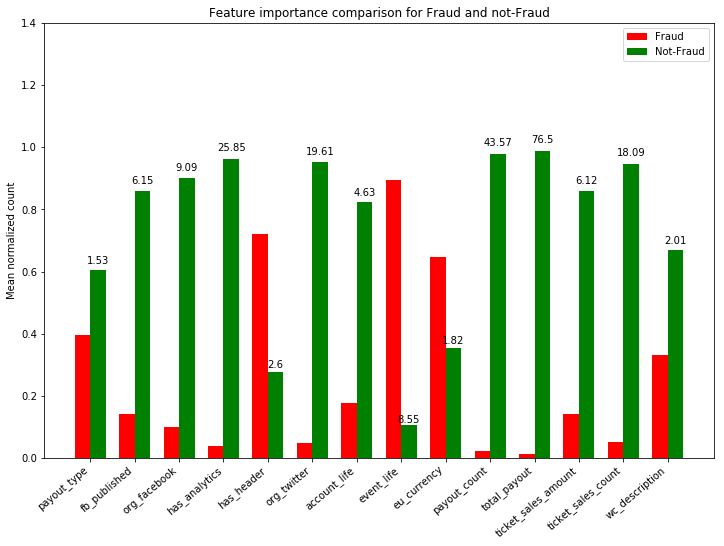

In [127]:
ind = np.arange(len(feature_diff_list))
width = 0.35

fig, ax = plt.subplots()
fig.set_figwidth(12)
fig.set_figheight(8)
rects1 = ax.bar(ind, feature_diff_list[:, 1], width, color='r')
rects2 = ax.bar(ind + width, feature_diff_list[:, 2], width, color='g')


# add some text for labels, title and axes ticks

plt.ylim([0,1.4])


ax.set_ylabel('Mean normalized count')
ax.set_title('Feature importance comparison for Fraud and not-Fraud')
ax.set_xticks(ind  + width / 2)
ax.set_xticklabels(feature_diff_list[:, 0], rotation=40, ha='right')

ax.legend((rects1[0], rects2[0]), ('Fraud', 'Not-Fraud'))

# bar_labels = round(feature_diff_list[:, 3], 2)

plt.figure(figsize=(12, 8))
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for i, rect in enumerate(rects):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height, feature_diff_list[i, 3], ha='center', va='bottom')

def autolabel2(rects):
    """
    No text label for the fraud data
    """
    for rect in rects:
        height = rect.get_height()

autolabel(rects2)
autolabel2(rects1)

fig.savefig('../images/feature_imp.png')



# plt.show()


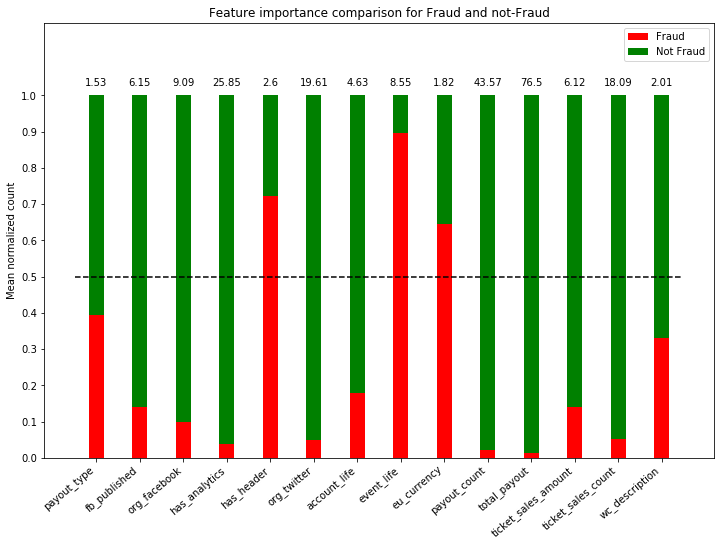

In [161]:
ind = np.arange(len(feature_diff_list))
width = 0.35

fig, ax = plt.subplots()
fig.set_figwidth(12)
fig.set_figheight(8)
plt.ylim([0,1.2])

plt.ylabel('Mean normalized count')
ax.set_title('Feature importance comparison for Fraud and not-Fraud')
plt.xticks(ind, (feature_diff_list[:, 0]))
ax.set_xticklabels(feature_diff_list[:, 0], rotation=40, ha='right')
plt.yticks(np.arange(0, 1.1, 0.1))

plt.hlines(0.5, -0.5, 13.5, 'k', 'dashed')

f = (feature_diff_list[:, 1])
nf = (feature_diff_list[:, 2])

p1 = plt.bar(ind, f, width, color='r')
p2 = plt.bar(ind, nf, width, bottom=f, color='g')


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for i, rect in enumerate(rects):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02, feature_diff_list[i, 3], ha='center', va='bottom')

autolabel(p2)

plt.legend((p1[0], p2[0]), ('Fraud', 'Not Fraud'))

fig.savefig('../images/feature_imp_single_bar.png')


plt.show()

# Model Fitting

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [142]:
gb = GBC()
gb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [143]:
y_pred = gb.predict(X_test)
gb.score(X_test, y_test)

0.98647506339814028

In [144]:
confusion_matrix(y_test, y_pred) # (TN  FP \n FN  TP)

array([[4302,   21],
       [  43,  366]])

In [11]:
parameters = {'learning_rate' : [0.01, 0.005], 
              'subsample' : [0.5, 0.3], 
              'n_estimators' : [6000, 3000], 
             'max_depth' : [4, 5, 3]}

clf = GBC()

search = Grid(clf, parameters, cv = 3, n_jobs = -1)
search.fit(X_train, y_train)
print "Best score :", search.best_score_
print "Best Params :", search.best_params_
print "Test Score", search.score(X_test, y_test)

Best score : 0.984903695992
Best Params : {'n_estimators': 3000, 'subsample': 0.5, 'learning_rate': 0.01, 'max_depth': 4}
Test Score 0.987320371936


In [12]:
y_pred = search.predict(X_test)

In [14]:
confusion_matrix(y_test, y_pred)

array([[4272,   16],
       [  44,  400]])

In [22]:
1 - (451.0/np.sum(y==1))

0.6511987625676721

In [5]:
from sklearn.ensemble import RandomForestClassifier as RF
rf = RF()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)
y_pred = rf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[4286,   24],
       [  45,  377]])

In [6]:
parameters = {'n_estimators' : [100, 150, 200], 
              'min_samples_split' : [25, 50], 
              'min_samples_leaf' : [1, 3, 5], 
             'max_depth' : [20, 50, 100],
             'oob_score' : [True, False]}

clf = RF()

search = Grid(clf, parameters, cv = 3, n_jobs = -1)
search.fit(X_train, y_train)
print "Best score :", search.best_score_
print "Best Params :", search.best_params_
print "Test Score", search.score(X_test, y_test)

Best score : 0.983029672046
Best Params : {'min_samples_split': 25, 'n_estimators': 100, 'oob_score': True, 'max_depth': 50, 'min_samples_leaf': 1}
Test Score 0.98415046492


In [ ]:
rf = RF(n_estimators=150, min_samples_split=25, min_samples_leaf=3, min_impurity_split=1e-2, max_depth = 50, oob_score=True)
rf.fit(X_train, y_train)
print 'Score is ', rf.score(X_test, y_test)
y_pred = rf.predict(X_test)
print 'Confusion matrix :\n', confusion_matrix(y_test, y_pred)


In [161]:
rf = RF(n_estimators=150, min_samples_split=25, max_leaf_nodes=None, min_samples_leaf=3, min_impurity_split=1e-2, max_depth = 50, oob_score=True)
rf.fit(X_train, y_train)
print 'score is ', rf.score(X_test, y_test)
y_pred = rf.predict(X_test)
confusion_matrix(y_test, y_pred)

score is  0.983093829248


array([[4299,   24],
       [  56,  353]])

In [93]:
rf?

In [129]:
rf = RF(n_estimators=150, min_samples_split=10, min_samples_leaf=1, min_impurity_split=1e-5, max_depth = 30, oob_score=True)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)
y_pred = rf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[4273,   15],
       [  41,  403]])